# Part I - (Prosper Loan Data)
## by (Blessing Olayemi)

## Introduction
> The dataset is from a loan company called Prosper. It is a San-Franscisco based company involved in peer-to-peer lending. This dataset consists of 113,937 loans with over 81 variables on each loan. Some of the variables include;

Loan Amount: This is the original/initial amount of loan taken.

Borrower Rate or Interest Rate: is the borrower's interest rate for the loan.

Current loan status: This indicates the current status of the loan.

Borrower APR: The  borrowe's annual percentage rate from the loan.

Listing Creation Date: The date the listing was created.

>These are a few of the variables present in this dataset. I'll be performing exploratory data analysis on this dataset to predict patterns and trends and to detect relationships bewteen the variables.
 

## Preliminary Wrangling


In [1]:
# importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#I'll load in my dataset here

prosper = pd.read_csv('prosperLoanData.csv')
prosper.head().T

,0,1,2,3,4
ListingKey,1021339766868145413AB3B,10273602499503308B223C1,0EE9337825851032864889A,0EF5356002482715299901A,0F023589499656230C5E3E2
ListingNumber,193129,1209647,81716,658116,909464
ListingCreationDate,2007-08-26 19:09:29.263000000,2014-02-27 08:28:07.900000000,2007-01-05 15:00:47.090000000,2012-10-22 11:02:35.010000000,2013-09-14 18:38:39.097000000
CreditGrade,C,NaN,HR,NaN,NaN
Term,36,36,36,36,36
...,...,...,...,...,...
PercentFunded,1.0,1.0,1.0,1.0,1.0
Recommendations,0,0,0,0,0
InvestmentFromFriendsCount,0,0,0,0,0
InvestmentFromFriendsAmount,0.0,0.0,0.0,0.0,0.0


### What is the structure of your dataset?


In [3]:
#I'll take a look at the dataset structure
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#I'll check for duplicates
prosper.duplicated().sum()

0

 >There are no duplicates in the dataset, however, I observed that the date are not in the datatime format. I'll be correcting that.

In [5]:
import locale

In [6]:
#list out all the columns containing dates in the dataset
dates = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'LoanOriginationDate', 'FirstRecordedCreditLine']

#loop through and change the format to datetime
for date in dates:
    prosper[date] = pd.to_datetime(prosper[date])


>I'll list out my features of interest for the course of this analysis

### What is/are the main feature(s) of interest in your data set?

In [8]:
#Here, I'll list out all variables of interest and put them in a new dataframe

prosper_loan = prosper[['BorrowerAPR', 'LoanOriginalAmount', 'ListingCreationDate', 'ClosedDate', 'Occupation', 'Term', 'ProsperRating (numeric)', 'CreditGrade', 'LoanOriginationDate', 'EmploymentStatus', 
                        'BorrowerState', 'IsBorrowerHomeowner', 'Investors', 'IncomeRange', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'ProsperScore', 'ProsperRating (Alpha)']] 

In [9]:
#Take a look at my new dataframe

prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   BorrowerAPR              113912 non-null  float64       
 1   LoanOriginalAmount       113937 non-null  int64         
 2   ListingCreationDate      113937 non-null  datetime64[ns]
 3   ClosedDate               55089 non-null   datetime64[ns]
 4   Occupation               110349 non-null  object        
 5   Term                     113937 non-null  int64         
 6   ProsperRating (numeric)  84853 non-null   float64       
 7   CreditGrade              28953 non-null   object        
 8   LoanOriginationDate      113937 non-null  datetime64[ns]
 9   EmploymentStatus         111682 non-null  object        
 10  BorrowerState            108422 non-null  object        
 11  IsBorrowerHomeowner      113937 non-null  bool          
 12  Investors       

In [10]:
prosper_loan.head().T

,0,1,2,3,4
BorrowerAPR,0.16516,0.12016,0.28269,0.12528,0.24614
LoanOriginalAmount,9425,10000,3001,10000,15000
ListingCreationDate,2007-08-26 19:09:29.263000,2014-02-27 08:28:07.900000,2007-01-05 15:00:47.090000,2012-10-22 11:02:35.010000,2013-09-14 18:38:39.097000
ClosedDate,2009-08-14 00:00:00,NaT,2009-12-17 00:00:00,NaT,NaT
Occupation,Other,Professional,Other,Skilled Labor,Executive
Term,36,36,36,36,36
ProsperRating (numeric),NaN,6.0,NaN,6.0,3.0
CreditGrade,C,NaN,HR,NaN,NaN
LoanOriginationDate,2007-09-12 00:00:00,2014-03-03 00:00:00,2007-01-17 00:00:00,2012-11-01 00:00:00,2013-09-20 00:00:00
EmploymentStatus,Self-employed,Employed,Not available,Employed,Employed


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some of the main features of interest that will help support my investigation are `Prosper Rating(Alpha)`,  `EmploymentStatus`, `Term`, `Occupation`, `IsBorrowerHomeOwner` etc.

## Univariate Exploration


### Question 1
> What is the employment status of the borrowers?

### Visualization 1

In [11]:
# I'll create a function to define the figure size
def fig_size(a,b):
    # Set figsize parameters
    return plt.figure(figsize=(a,b))

#I'll set a base color to be used throughout the notebook
base_color = sb.color_palette()[0]

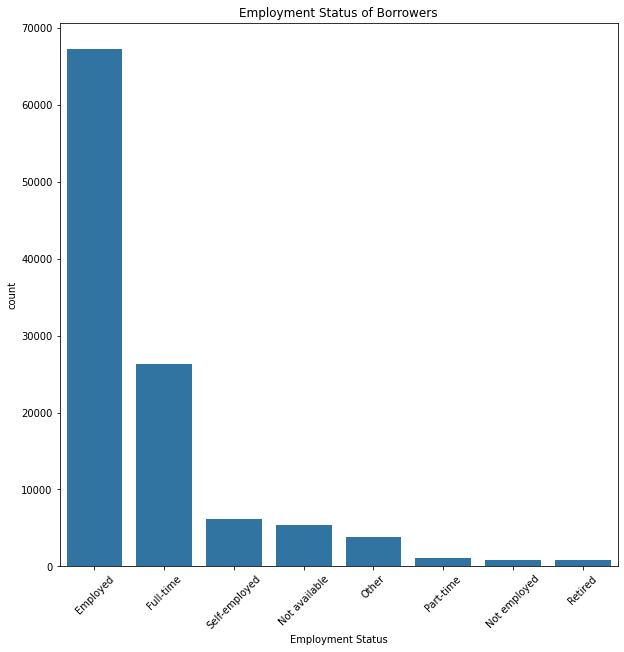

In [12]:
#Plot the graph for Employment Status 
fig_size(10,10)
employed_order = prosper_loan['EmploymentStatus'].value_counts().index
sb.countplot(data=prosper_loan, x='EmploymentStatus', color=base_color, order=employed_order);
plt.xticks(rotation = 45);
plt.xlabel('Employment Status')
plt.title('Employment Status of Borrowers');

### Observation
> The graph shows that a majority of the loan borrowers are employed.

### Question 2
> What is the occupation of the borrowers?

### Visualization 2

Text(0.5, 1.0, 'Occupation of Borrowers')

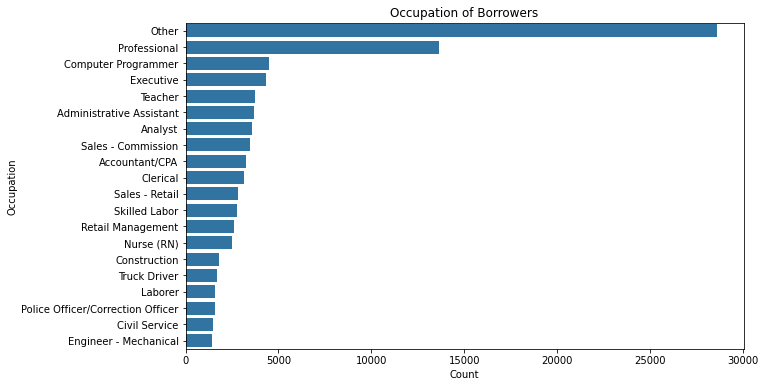

In [13]:
#I will limit the visualization to the top 20 occupation?

fig_size(10,6)
occupation_order = prosper_loan.Occupation.value_counts().iloc[:20].index
sb.countplot(data= prosper_loan, y= 'Occupation', color= base_color, order= occupation_order)
plt.xlabel('Count')
plt.title('Occupation of Borrowers')

### Observation
> The foremost occupation is undefined hence identified by others but next, we see that Professionals, Computer Programmers and Executives are the most frequent loan borrowers.

### Question 3
> What is your first predictor variable of interest?
> Answer: Prosper Rating(Alpha)

>**ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.  

In [14]:
# Convert ProsperRating to an ordered type
type_order = ['AA','A','B','C','D','E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = type_order)
prosper_loan.loc[:,'ProsperRating (Alpha)'] = prosper_loan.loc[:,'ProsperRating (Alpha)'].astype(ordered_var, copy=True)

### Visualization 3

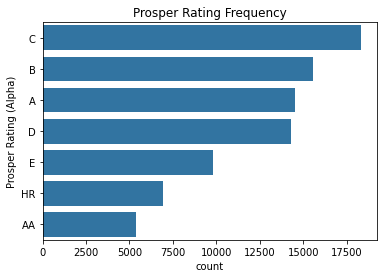

In [15]:
# Plot the Prosper Rating 
type_order = prosper_loan['ProsperRating (Alpha)'].value_counts().index
sb.countplot(data=prosper_loan, y='ProsperRating (Alpha)', color=base_color, order=type_order);
plt.ylabel('Prosper Rating (Alpha)');
plt.title('Prosper Rating Frequency');

### Observation
> The rating that is most common amongst the borrowers are from C to D.

### Question 4

> What are the term(duration of the loans) expressed in  months?

### Visualization 4

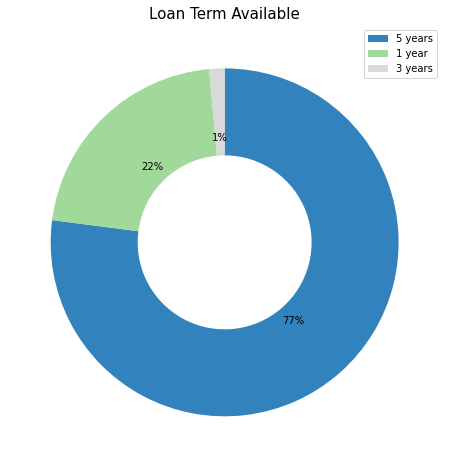

In [17]:
prosper_loan.Term.value_counts().plot(kind= 'pie', autopct= '%.0f%%', figsize= (10,8), startangle=90, 
                              counterclock=False, wedgeprops= {'width': 0.5}, labeldistance = None,
                             cmap=plt.get_cmap('tab20c'))
plt.ylabel("")
plt.legend(labels= ['5 years', '1 year', '3 years'])
plt.title('Loan Term Available', fontsize= 15);

### Observation
> We can observe that most loans last over a period of 36 months, i.e a 3 year duration, which is followed by a loan duration of 60 months i.e 5 years. We observe that the term of 60 months pales in comparison to the term of 36 months. We also see that there are only few loans with a duration of 12 months.

### Question 5
> How many of the loan borrowers own homes?

### Visualization 5

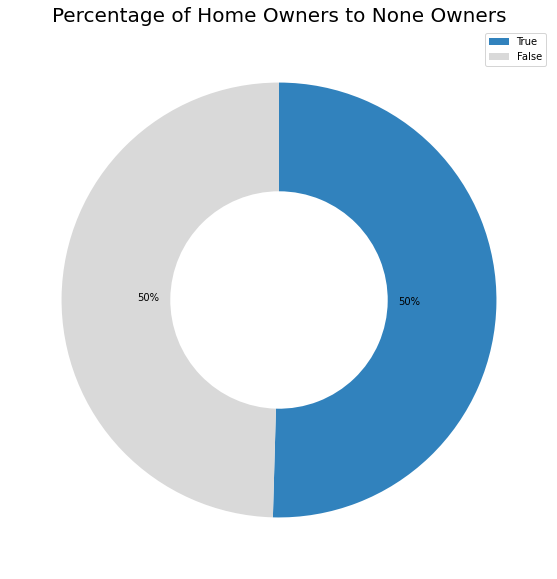

In [18]:

prosper_loan.IsBorrowerHomeowner.value_counts().plot(kind= 'pie', autopct= '%.0f%%', figsize= (10,10), startangle=90,
                                             counterclock=False, wedgeprops= {'width': 0.5}, labeldistance = None, 
                                             cmap=plt.get_cmap('tab20c'))

plt.ylabel("")
plt.legend()
plt.title('Percentage of Home Owners to None Owners', fontsize= 20);

### Observation
> The ratio between the home owners and non home owners is evenly distributed(50:50). 

### Question 6
> I'll like to look at the distribution of debt to income ratio. 

>**DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

### Visualization 6

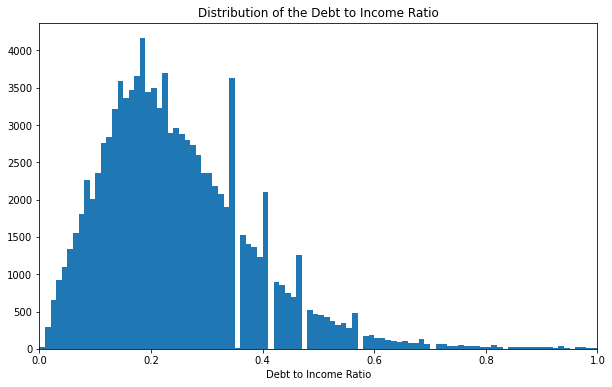

In [19]:
fig_size(10,6)
in_bins = np.arange(prosper_loan.DebtToIncomeRatio.min(), prosper_loan.DebtToIncomeRatio.max()+0.01, 0.01)
plt.hist(data=prosper_loan, x='DebtToIncomeRatio', bins=in_bins);
plt.xlim(0,1);
plt.xlabel('Debt to Income Ratio');
plt.title('Distribution of the Debt to Income Ratio');

### Observation
>The distribution of the DebtToIncomeRatio is highly skewed to the right by the presence of those with very high incomes to their debt. This isn't unexpected in a real-world scenario and no changes were made to the data to account for this. It will be interesting to see how this affects the interest rates of the loans.

### Question 7
> Which States has the highest number of borrowers?

### Visualization 7

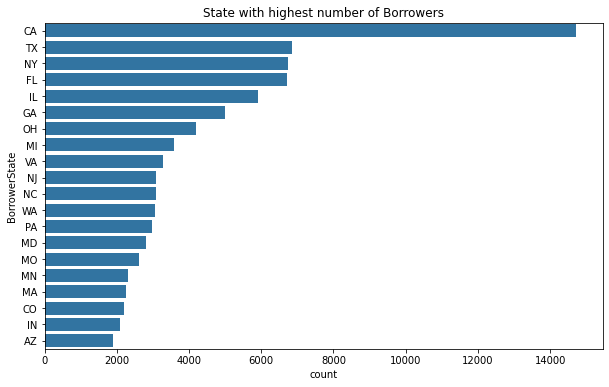

In [20]:
fig_size(10,6)
state_order = prosper_loan.BorrowerState.value_counts().iloc[:20].index
sb.countplot(data= prosper_loan, y= 'BorrowerState', color= base_color, 
order= state_order).set_title("State with highest number of Borrowers");
plt.xlabel='Count'
plt.ylabel='BorrowerState';

### Observation
> From the graph above, we can see that CA-California, TX-Texas, NY-New York, FL-Florida, IL-Illinois are the states with the highest borrowers.

### Question 8

What is the income range of the borrowers? Is there a particular income range associated with the loan listings?


### Visualization 8

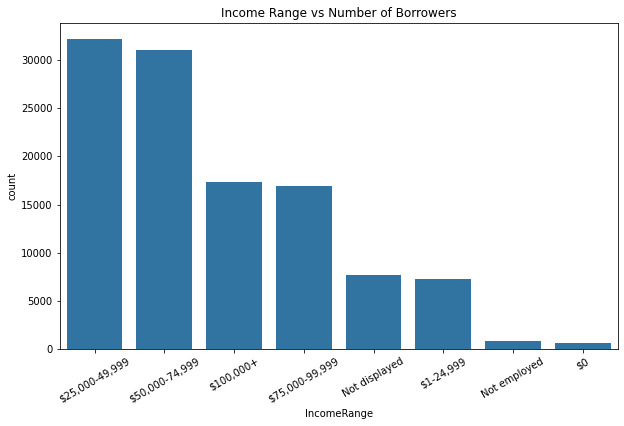

In [21]:
fig_size(10,6)
income_order = ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed','$1-24,999','Not employed','$0']
sb.countplot(data= prosper_loan, x= 'IncomeRange', color= base_color,
 order= income_order).set_title("Income Range vs Number of Borrowers");
plt.xlabel='Income Range ($)'
plt.ylabel='Number of Borrowers'
plt.xticks(rotation=30);

### Observation

It is evident that people who earn between `$25,000- $75,000` make up the largest chunk of borrowers, well this is understandable as this falls within the range of the average income earners in the U.S.
Also observed that unemployed people or people who do not have any source of income rarely take loans and this correlates with our chart on the employment status of borrowers.

### Question 9
> What is the distribution of Borrower's Annual Percentage Rate

### Visualization 9

TypeError: 'str' object is not callable

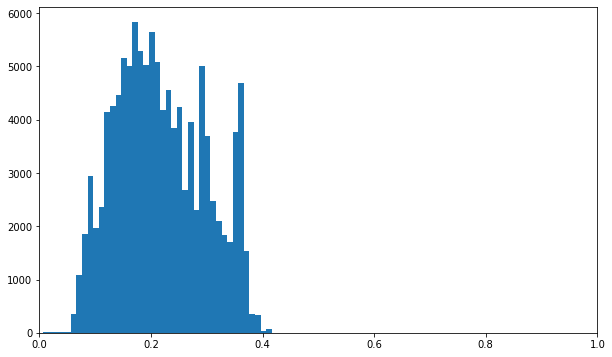

In [27]:
fig_size(10,6)
in_bins = np.arange(prosper_loan.BorrowerAPR.min(), prosper_loan.BorrowerAPR.max()+0.01, 0.01)
plt.hist(data=prosper_loan, x='BorrowerAPR', bins=in_bins)
plt.xlim(0,1)
plt.xlabel('Distribution of Borrower APR');
plt.title('Distribution of Borrower APR');

### Observation
> The distribution is a multimodal distribution which is skewed to the right. We should put into consideration thatborrower's Annual Percentage Rate contain some fees (such as discount points, most closing costs, mortgage insurance, and loan origination fees) most of which affects the total cost of loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variables I find interesting are `Prosper Rating(Alpha)`, `IsBorrowerHomeOwner`, and `EmploymentStatus`. I did not need to perform any transformations on the variables'
> There was no need to perform any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I found the distribution of the home owners to non home owners to be unusual because I didn't expect more home owners to take loan. However, it turns out more home owners take loans for home improvement.
> It was also interesting to find out that most loan borrowers are gainfully employed.

## Bivariate Exploration

### Question 10
> Does the Employment status of Borrowers generally affect loan accessible to them?

### Visualization 10

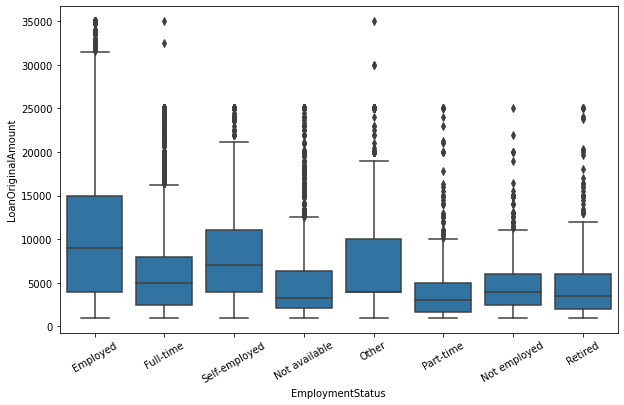

In [24]:
fig_size(10,6)
sb.boxplot(data=prosper_loan, x= 'EmploymentStatus', y= 'LoanOriginalAmount', color= base_color, order= employed_order)
plt.title='Employment status vs Loan Amount'
plt.xlabel='Employment Status'
plt.ylabel='Loan Amount ($)'
plt.xticks(rotation=30);

### Observation
> This boxplot shows us that people who are employed stand a higher chance of getting a loan and this makes sense because they are more likely to have the resources to pay back.

### Question 11
> What is the most common employment status in each prosper rating(alpha)?

### Visualization 11

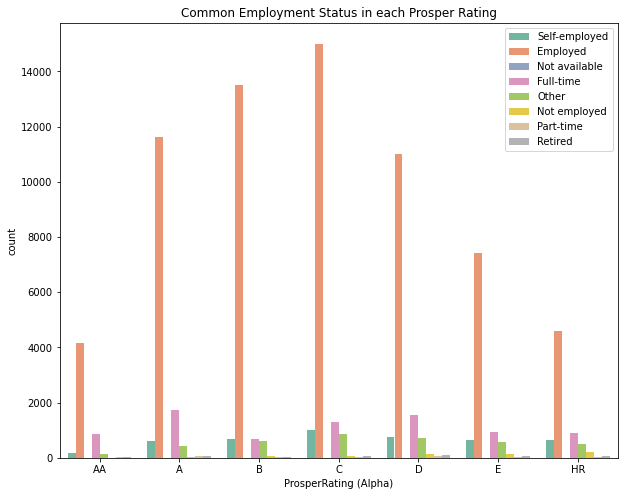

In [25]:
plt.figure(figsize = [10, 8])
sb.countplot(data=prosper_loan, x='ProsperRating (Alpha)', hue='EmploymentStatus', 
palette='Set2').set_title("Common Employment Status in each Prosper Rating");
plt.legend(loc=1);

### Observation
>A great proportions of individuals with Employment status Not Employed, Self-employed, Retired, and Part-Time seems to have a lower rating.

### Question 12
> What is the distribution of home owners across the various Income range?

### Visualization 12

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '$25,000-49,999'),
  Text(1, 0, '$50,000-74,999'),
  Text(2, 0, '$100,000+'),
  Text(3, 0, '$75,000-99,999'),
  Text(4, 0, 'Not displayed'),
  Text(5, 0, '$1-24,999'),
  Text(6, 0, 'Not employed'),
  Text(7, 0, '$0')])

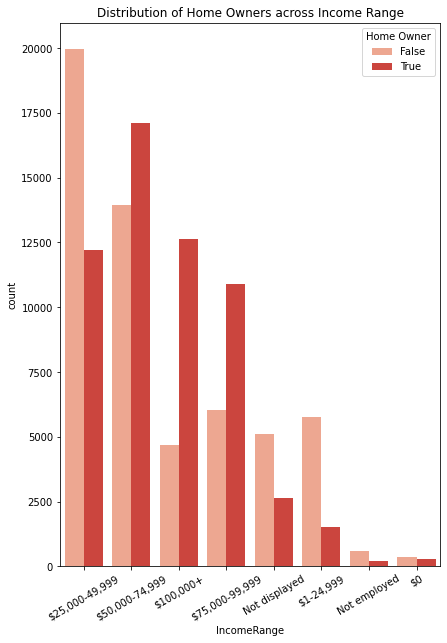

In [29]:
fig_size(15,10)


plt.subplot(1, 2, 1)
sb.countplot(data = prosper_loan, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'Reds', 
order = income_order).set_title("Distribution of Home Owners across Income Range");
plt.legend(title= 'Home Owner')
plt.xticks(rotation=30)

### Observation
> Starting off from those who earn more i.e 100k+ we find that they are two times more likely to be Home owners and the trend generally shows that the higher the borrowers earn the more likely it is that they would be a Home owner, likewise the lesser the borrower earns the less likely it is they would be a Home owner.

### Question 13
> What is the distribution of home owners among the employment status?

### Visualization 13

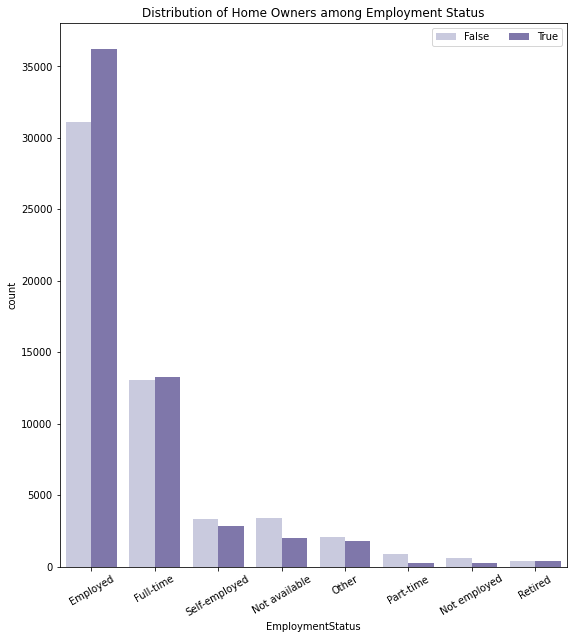

In [30]:
fig_size(20,10)
ax = plt.subplot(1, 2, 2)
sb.countplot(data = prosper_loan, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Purples',
 order = employed_order).set_title("Distribution of Home Owners among Employment Status");
ax.legend(ncol = 2)
plt.xticks(rotation=30);

### Observation
> We can observe from here that the larger percentage of homeowners are gainfully employed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I could see that those who earn more like about 100k and above are two times more likely to be homeowners.
> I observed that those who are gainfully employed stand a better chance of getting a loan and been homeowners because it seems most loan were taken to finance home mortgage.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed an interesting relationship between borrower's who are gainfully employed, who are home owners and have more loan accesibility as it seems one of these factor greatly affected the other.

## Multivariate Exploration

### Question 14
> Is there a difference between the loan amount accessible to Home owners and None owners across the same income range?

### Visualization 14

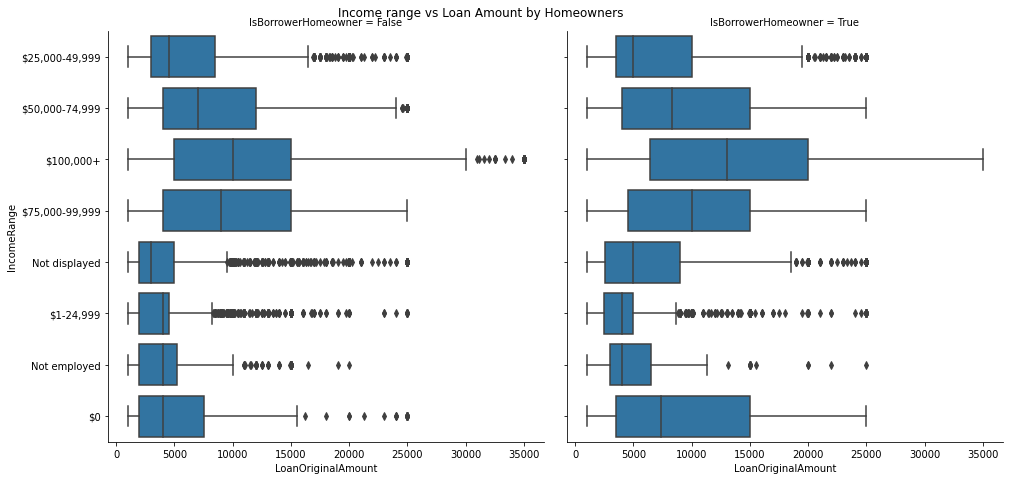

In [31]:
g= sb.FacetGrid(data= prosper_loan, col = 'IsBorrowerHomeowner', height = 5)
g.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = income_order)
plt.suptitle('Income range vs Loan Amount by Homeowners')
g.fig.set_size_inches(15,7);

### Observation

> An interesting observation is that home owners who do not earn can access higher amount of loans compared to None home owners. It also seems that home owners generally do better and across all the income ranges.

###  Question 15

> Are there differences in the distribution of Loan accessible to all income range across three terms available?

### Visualization 15

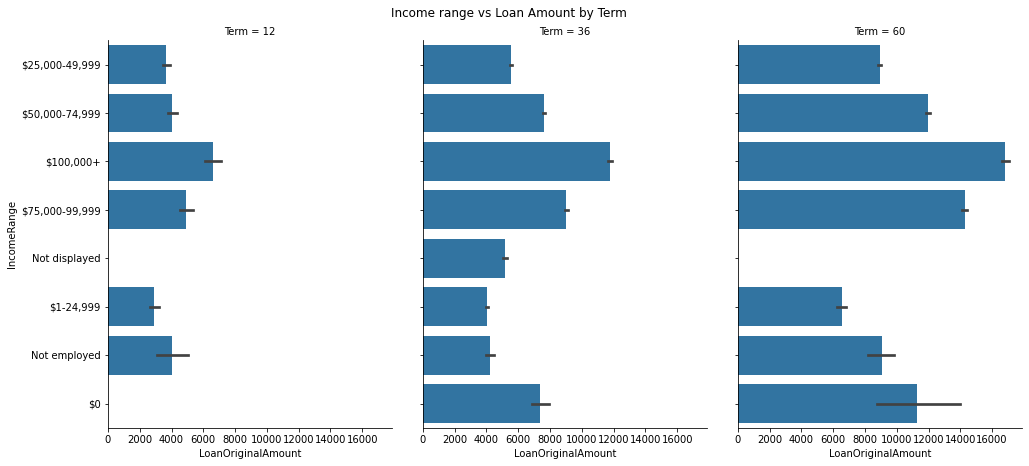

In [32]:
g= sb.FacetGrid(data= prosper_loan, col = 'Term', height = 4)
g.map(sb.barplot, 'LoanOriginalAmount', 'IncomeRange', order = income_order)
plt.suptitle('Income range vs Loan Amount by Term')
g.fig.set_size_inches(15,7);

### Observation

> I cann observe that borrowers who are unemployed and not earning can still get access to higher amount of loans with even longer terms.

## Conclusions

### Summary of the Findings

1. California is the city with the highest number of borrower's.
2. A larger percentage of the borrower's are gainfully employed.
3. The ratio of home owners to non-home owners amongst the borrowers is evenly distributed. i.e 50:50.
4. Most of the loans taken have a term of 36 months.
5. Home owners have a higher possibility of accessing a loan regardless of their employment status.
6. The distribution of the debt to income ratio is relatively low.
7.  There is a relationship between Income range and Loan amount as there is a consistent increase in the mean and percentile as income range increases.



In [28]:

!jupyter nbconvert blessing_exploration.ipynb --to html

[NbConvertApp] Converting notebook blessing_exploration.ipynb to html
[NbConvertApp] Writing 1054232 bytes to blessing_exploration.html
